# 24/30 Apprentissage Non-Supervisé

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## 1. K-Means Clustering

In [2]:
from sklearn.cluster import KMeans

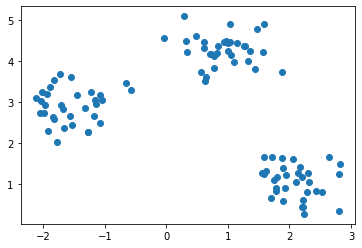

In [4]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

-30.870531280140664

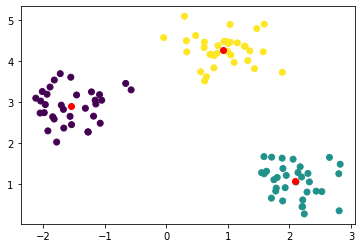

In [4]:
# model = KMeans(n_clusters=3, n_init=10, max_iter=300, init='k-means++')
model = KMeans(n_clusters=3)
model.fit(X)
model.labels_ # permet de voir comment sont classés nos différents échantillons
model.predict(X) # ~ model.labels_
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
model.cluster_centers_ # affichage position finale de nos centroides
# tableau de trois lignes et deux colonnes car 2 dimensions avec model = KMeans(n_clusters=3)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.inertia_ # attribut pour calculer la fonction coût de notre modèle
# somme des distances entre les points du cluster
model.score(X) # attribut pour calculer la fonction coût de notre modèle

### Elbow Method

Text(0, 0.5, 'Cout du modele (Inertia)')

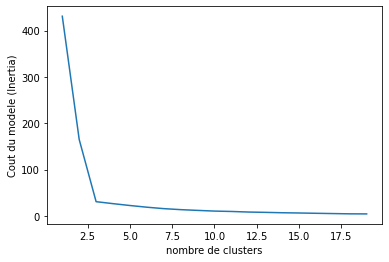

In [5]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

## 2. Détection d'anomalies avec Isolation Forest

In [6]:
from sklearn.ensemble import IsolationForest

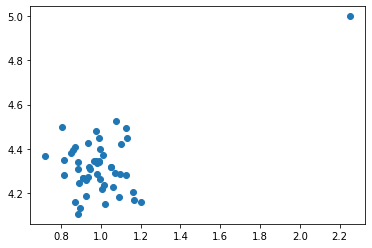

In [7]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

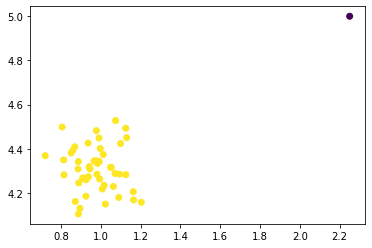

In [8]:
model = IsolationForest(contamination=0.01)
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

### Application : Digits Outliers

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)


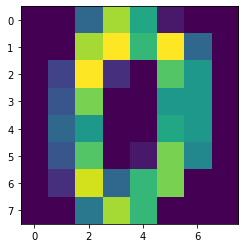

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
print(X)
y = digits.target
print(y)

print(X.shape)
plt.imshow(images[0])

[[ 0.  0.  0.  0. 11. 15.  4.  0.]
 [ 0.  0.  0.  3. 16. 16. 12.  0.]
 [ 0.  0.  0.  8. 14. 16. 12.  0.]
 [ 0.  0.  0.  5. 10. 16.  6.  0.]
 [ 0.  1.  7. 11. 16. 13.  0.  0.]
 [ 0.  9. 16. 16. 14.  1.  0.  0.]
 [ 0.  3.  8. 14. 16.  9.  0.  0.]
 [ 0.  0.  0.  1. 11. 16. 12.  0.]]


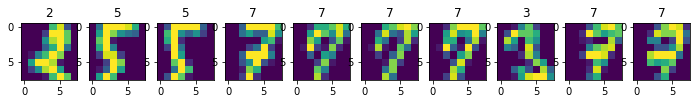

In [10]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)
# print(model.predict(X))
outliers = model.predict(X) == -1 # boolean indexing
# print(outliers)
# print(images[outliers]) # tableau contenant les images avec des outliers
print(images[outliers][0]) # première image

plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

## 2. PCA : Reduction de dimension

### Visualisation 2D

In [11]:
from sklearn.decomposition import PCA

In [12]:
X.shape

(1797, 64)

In [13]:
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)
# model.fit_transform(X).shape

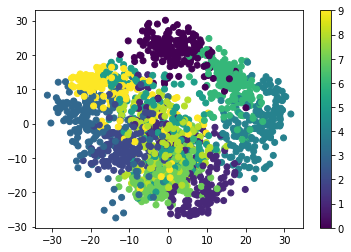

In [14]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
# rappel : y contient les étiquettes de nos échantillons 
# (leurs différentes valeurs : chiffres 0, 1, 2,....,9)
plt.colorbar()
# visualisation de l'organisation dans un espace 2D les chiffres du dataset digits

In [15]:
model.components_ 
# contenu des composantes 1 et 2 correspondant au graphique ci-dessus
model.components_.shape
# (2, 64) : chaque composante (1) est combinaison linéaire des 64 
# autres composantes, donc de dimension (1, 64)

(2, 64)

### Visualisation 2D

In [16]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)

PCA(n_components=2)

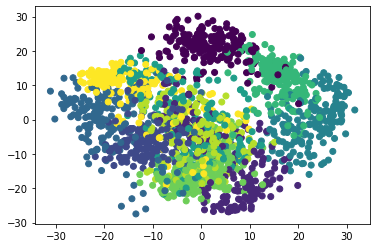

In [17]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

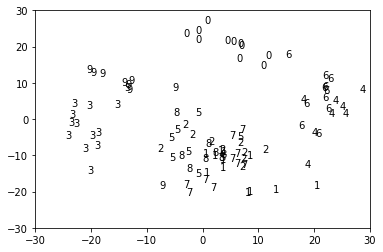

In [18]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(x_pca[i,0], x_pca[i,1], str(y[i]))

### Compression de données

In [19]:
from sklearn.decomposition import PCA

In [20]:
X.shape

(1797, 64)

In [21]:
# Entraînement
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)

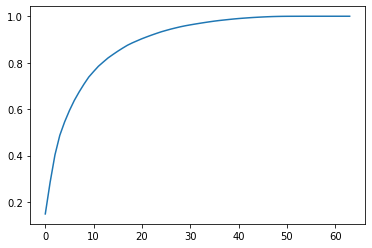

In [22]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [23]:
# Recherche de l'endroit où la variance conservée est supérieure à 99 %
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99)
# model.n_components_

40

In [68]:
# Réentraînement / Compression
model = PCA(n_components=40)
# model = PCA(n_components=0.99)
X_reduced = model.fit_transform(X)
X_reduced.shape

(1797, 40)

In [69]:
# Décompression 
X_recovered = model.inverse_transform(X_reduced)

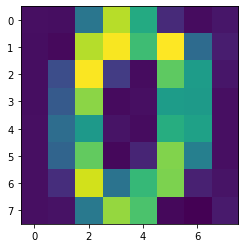

In [74]:
plt.imshow(X_recovered[0,:].reshape((8,8)))
# plt.imshow(X_recovered[0].reshape((8,8)))

In [75]:
model.n_components_

41

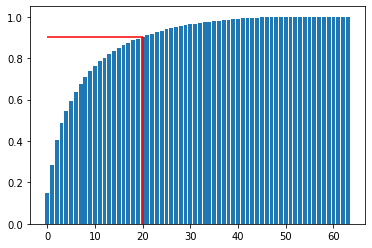

In [71]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')


In [72]:
model = PCA(n_components=0.99)
model.fit(X)

PCA(n_components=0.99)

Text(0.5, 1.0, 'Compressé')

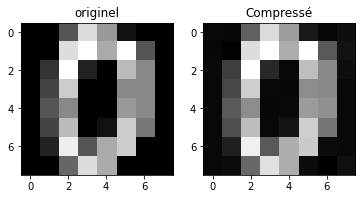

In [73]:
X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('originel')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressé')